In [1]:
import os
print(os.getcwd())

C:\Users\ACER\Desktop


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real,Categorical,Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isnull().any().any()

False

In [6]:
df.duplicated().any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'correlation heatmap')

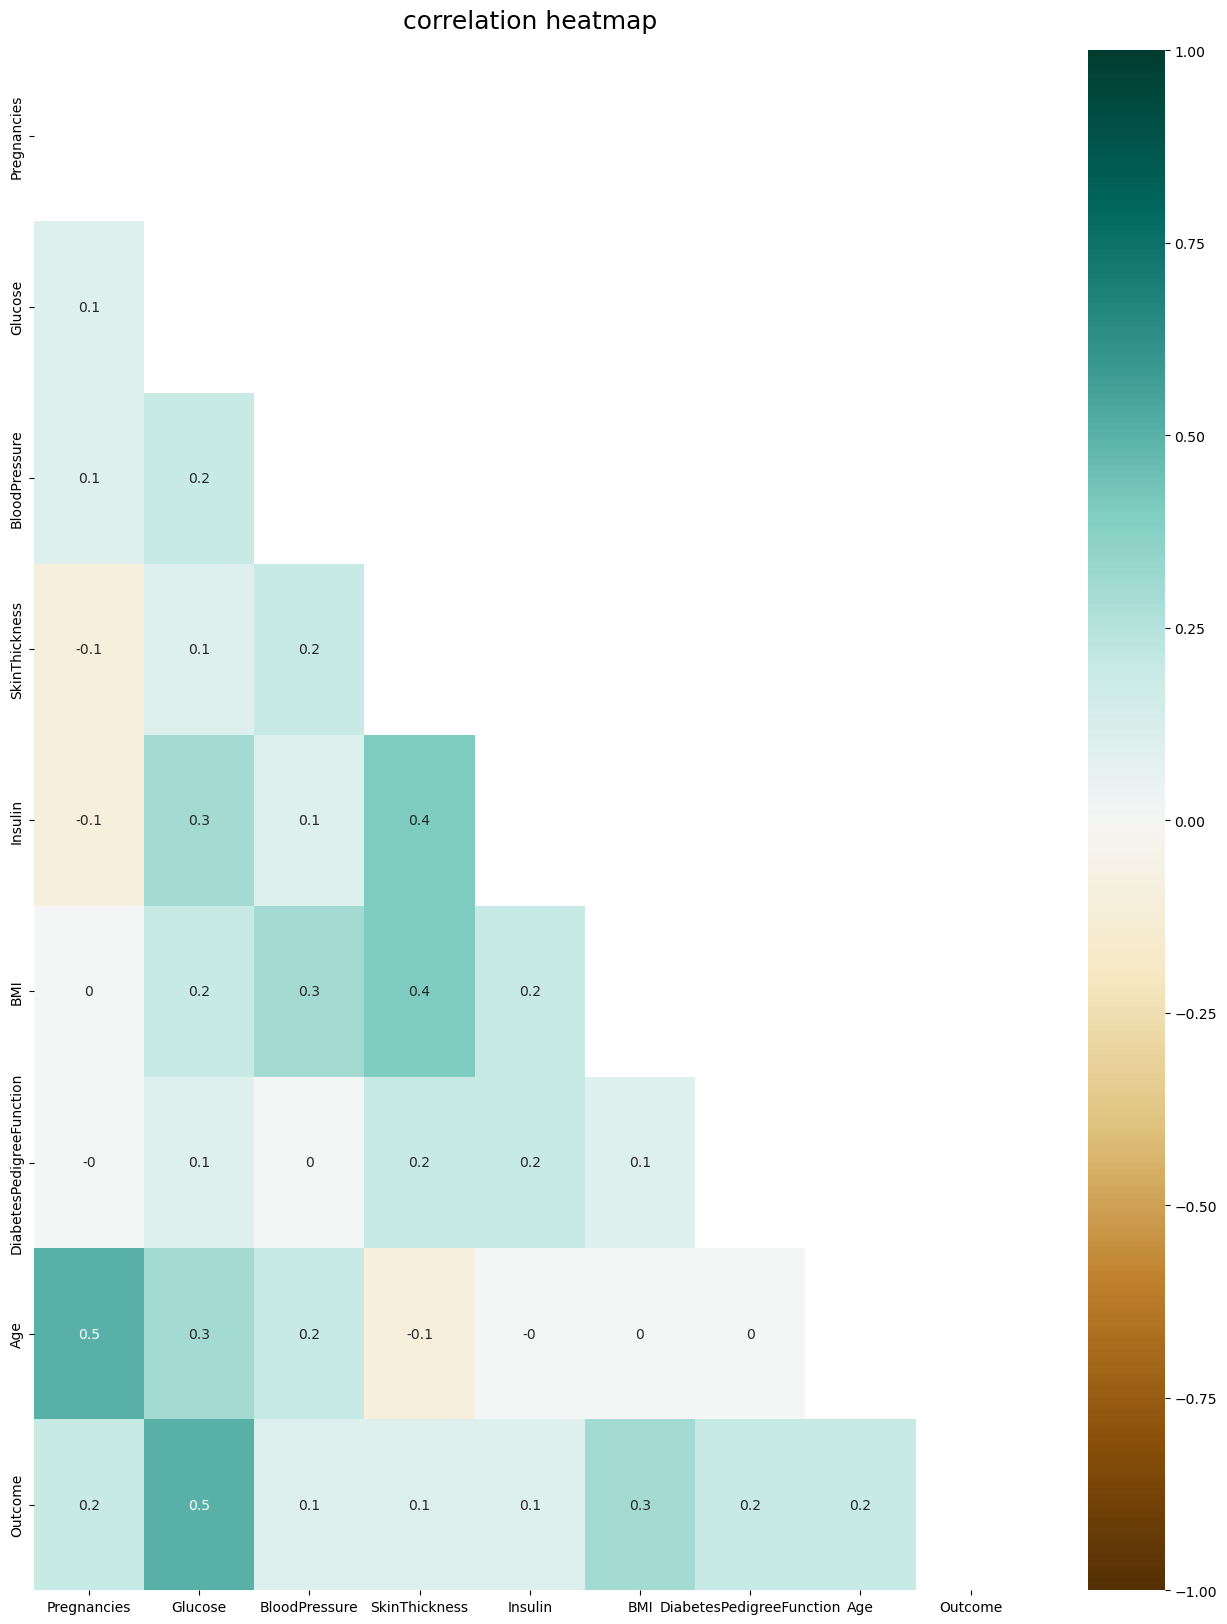

In [8]:
plt.figure(figsize=(16,20))
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
heatmap=sns.heatmap(round(df.corr(),1),mask=mask,vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('correlation heatmap',fontdict={'fontsize':18},pad=16)

In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [13]:
!pip install xgboost
from xgboost import XGBClassifier

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [15]:
scaler=RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
xgb=XGBClassifier(use_label_encoder=False)
xgb.fit(X_train_scaled,y_train)
xgb_pred=xgb.predict(X_test_scaled)
accuracy_score(y_test,xgb_pred)

0.7229437229437229

In [17]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.79       150
           1       0.62      0.53      0.57        81

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



In [18]:
xgb = XGBClassifier(scale_pos_weight=1.8657, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled,y_train)
xgb_pred=xgb.predict(X_test_scaled)
accuracy_score(y_test,xgb_pred)


0.7402597402597403

In [19]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [20]:
!pip install imbalanced-learn


In [23]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)


In [24]:
xgb = XGBClassifier(scale_pos_weight=1.8657, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_res, y_res)
xgb_pred=xgb.predict(X_test_scaled)
accuracy_score(y_test,xgb_pred)

0.7402597402597403

In [25]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       150
           1       0.64      0.60      0.62        81

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
xgb=XGBClassifier(use_label_encoder=False)
xgb.fit(X_train_scaled,y_train)
xgb_pred=xgb.predict(X_test_scaled)
accuracy_score(y_test,xgb_pred)

0.7229437229437229

In [28]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.79       150
           1       0.62      0.53      0.57        81

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



In [29]:
xgb = XGBClassifier(scale_pos_weight=1.8657, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled,y_train)
xgb_pred=xgb.predict(X_test_scaled)
accuracy_score(y_test,xgb_pred)

0.7402597402597403

In [30]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [31]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)
xgb.fit(X_train_scaled,y_train)
xgb_pred=xgb.predict(X_test_scaled)
accuracy_score(y_test,xgb_pred)

0.7489177489177489

In [33]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



In [34]:
rfc_param={'n_estimators':[1,2,3,4,5,6,7,8,9,10],
           'learning_rate':[0.001,0.01,0.1,0.3,0.5],
           'max_depth':[1,2,3,4,5,6,7,8,9,10]}
random=RandomizedSearchCV(estimator=xgb,
                          param_distributions=rfc_param,
                          scoring='recall',
                          cv=5,n_iter=10,
                          return_train_score=True,
                          random_state=1234,verbose=0)
random.fit(X_train_scaled,y_train)
rfc_pred=random.predict(X_test_scaled)
accuracy_score(y_test,rfc_pred)

0.7316017316017316

In [35]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



In [36]:
rand_opt=XGBClassifier(use_label_encoder=False,n_estimators=1,max_depth=6,learning_rate=0.3)
print(classification_report(y_test,rand_opt.fit(X_train_scaled,y_train).predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81       150
           1       0.75      0.26      0.39        81

    accuracy                           0.71       231
   macro avg       0.73      0.61      0.60       231
weighted avg       0.72      0.71      0.66       231



In [37]:
! pip install optuna

In [38]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial):
    xgb_params = {
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 1),
        'n_estimators': trial.suggest_int("n_estimators", 1, 100),
        'max_depth': trial.suggest_int('max_depth', 1, 10)
    }
    xgb = XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train_scaled, y_train)
    y_pred = xgb.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)



study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=32)

[I 2023-09-15 17:25:54,331] A new study created in memory with name: no-name-b1ea7574-9ba6-420e-a5ea-9d8949e69e36
[I 2023-09-15 17:26:09,364] Trial 0 finished with value: 0.7445887445887446 and parameters: {'learning_rate': 0.4337299384839934, 'n_estimators': 62, 'max_depth': 2}. Best is trial 0 with value: 0.7445887445887446.
[I 2023-09-15 17:26:59,544] Trial 1 finished with value: 0.7532467532467533 and parameters: {'learning_rate': 0.6227878970580116, 'n_estimators': 53, 'max_depth': 6}. Best is trial 1 with value: 0.7532467532467533.
[I 2023-09-15 17:28:04,799] Trial 2 finished with value: 0.7532467532467533 and parameters: {'learning_rate': 0.3449046541845163, 'n_estimators': 83, 'max_depth': 5}. Best is trial 1 with value: 0.7532467532467533.
[I 2023-09-15 17:28:46,672] Trial 3 finished with value: 0.7575757575757576 and parameters: {'learning_rate': 0.12479078947575147, 'n_estimators': 84, 'max_depth': 5}. Best is trial 3 with value: 0.7575757575757576.
[I 2023-09-15 17:29:27,93

In [39]:
trial = study.best_trial
print(f"Number of finished trials: {len(study.trials)}")
print(f"The best trial is \n{trial}")

Number of finished trials: 32
The best trial is 
FrozenTrial(number=13, state=1, values=[0.7835497835497836], datetime_start=datetime.datetime(2023, 9, 15, 17, 33, 27, 905856), datetime_complete=datetime.datetime(2023, 9, 15, 17, 33, 55, 273927), params={'learning_rate': 0.17109982800287937, 'n_estimators': 28, 'max_depth': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=100, log=False, low=1, step=1), 'max_depth': IntDistribution(high=10, log=False, low=1, step=1)}, trial_id=13, value=None)


In [40]:
best_params = trial.params
print(f"The best hyperparameters are \n{best_params}")

The best hyperparameters are 
{'learning_rate': 0.17109982800287937, 'n_estimators': 28, 'max_depth': 9}


In [41]:
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

In [42]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       150
           1       0.74      0.59      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [45]:
grid_param={'n_estimators':[1,2,3,4,5,6,7,8,9,10],
           'learning_rate':[0.001,0.01,0.1,0.3,0.5],
           'max_depth':[1,2,3,4,5,6,7,8,9,10]}
random=GridSearchCV(estimator=xgb,
                          param_grid=grid_param,
                          scoring='recall',
                          cv=10,n_jobs=-1,
                          return_train_score=True)
random.fit(X_train_scaled,y_train)
grid_pred=random.predict(X_test_scaled)
accuracy_score(y_test,grid_pred)

0.7575757575757576

In [46]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.70      0.54      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231

